<a href="https://colab.research.google.com/github/somyagr/mlbootcamp/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **the** **libraries**

In [105]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

# **Importing the datasets**

In [106]:
train_df = pd.read_csv("sample_data/mnist_train_small.csv")
test_df = pd.read_csv("sample_data/mnist_test.csv")

In [107]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Arranging** **the** **training** **dataset**

In [109]:
x1 = train_df.drop(['6'], axis = 1).values

x0_train = np.ones((np.shape(x1)[0],1))

x_train = np.hstack((x0_train,x1))

In [110]:
print(x_train)
print(x_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(19999, 785)


In [111]:
y1 = train_df['6']
y_train = y1.to_numpy()
y_train = np.vstack(y_train)

In [112]:
print(y_train)
print(y_train.shape)

[[5]
 [7]
 [9]
 ...
 [2]
 [9]
 [5]]
(19999, 1)


# **Arranging the test dataset**


In [113]:
x2 = test_df.drop(['7'], axis = 1).values

x0_test = np.ones((np.shape(x2)[0],1))

x_test = np.hstack((x0_test,x2))

In [114]:
print(x_test)
print(x_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(9999, 785)


In [115]:
y2 = test_df['7']
y_test = y2.to_numpy()
y_test = np.vstack(y_test)

In [116]:
print(y_test)
print(y_test.shape)

[[2]
 [1]
 [0]
 ...
 [4]
 [5]
 [6]]
(9999, 1)


# **Visualising the data**

In [117]:
digit = x1[0]
digit_image = digit.reshape(28,28)

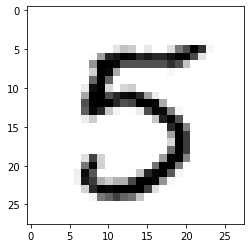

In [118]:
plt.imshow(digit_image, cmap = plt.cm.binary)

# **Implementation of model**

In [119]:
#Parameter initialisation

theta = np.zeros((np.shape(x_train)[1],1))

#Hypothesis declaration

y_pred = np.dot(x_train , theta)

#difference in values

diff = np.subtract(y_pred , y_train)

In [120]:
#Cost function
def cost_function(y, diff ) :
  
  sqr = np.square(diff)
  
  sum = np.sum(sqr)

  return (sum / ( 2 * y.shape[0] ))

In [121]:
#Updating the parameter theta

def update_theta( learning_rate, iterations, x, y, theta) :          
       
      for i in range( iterations ) : 

        y_pred = np.dot(x , theta)

        diff = np.subtract(y_pred , y)

        error =  np.dot(x.T, diff)
     
        theta = theta - (learning_rate * error ) / y.shape[0]
          
      return theta

In [122]:
#Applying gradient descent

iterations = 20000

learning_rate = 0.04

x_train = x_train/255
x_test = x_test/255

theta = update_theta( learning_rate, iterations, x_train, y_train, theta)

#y_pred = np.dot(x_train , theta)
y_pred = np.dot(x_test , theta)

#diff = np.subtract(y_pred , y_train)
diff = np.subtract(y_pred , y_test)

#cost_function(y_train, diff)
cost_function(y_test, diff)

1.7977397553017895

In [123]:
print ("The updated value of theta is ", theta)

The updated value of theta is  [[ 5.06989810e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.81205608e-03]
 [-6.07404114e-02]
 [-6.07404114e-02]
 [-2.53085047e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.18909652e-01]
 [ 1.94707848e-01]
 [ 1.71276981e-01]
 [ 1.41521784e-01]
 [ 4.25754241e-02]
 [-1.41620309e-01]
 [ 7.92460906e-02]
 [ 3.12529195e-02]
 [ 1.53769833e-01]
 [ 2.33674455e-01]
 [ 1.79459795e-01]
 [ 9.97178193e-02]
 [ 1.89550059e-01]
 [ 8.94128053e-02]
 [ 8.56585035e-02]
 [ 6.76805881e-03]


In [124]:
y_pred = np.around(y_pred)
print(y_pred)

[[2.]
 [1.]
 [1.]
 ...
 [9.]
 [6.]
 [7.]]


In [125]:
#l = np.hstack((y_train, y_pred))
l = np.hstack((y_test, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

      Actual  Predicted
0        2.0        2.0
1        1.0        1.0
2        0.0        1.0
3        4.0        3.0
4        1.0        1.0
...      ...        ...
9994     2.0        4.0
9995     3.0        3.0
9996     4.0        9.0
9997     5.0        6.0
9998     6.0        7.0

[9999 rows x 2 columns]


In [126]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is: ", accuracy_score(y_pred, y_test))

Accuracy of the model is:  0.23852385238523852
